In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split

In [2]:
X, y = make_classification(n_features = 5, n_samples = 100, n_classes = 2)

In [3]:
X

array([[-4.46344848e-02, -7.97181045e-01,  6.87045573e-02,
         9.78529121e-01, -4.36856739e-01],
       [ 8.28432363e-01,  2.01161252e-02,  3.77815011e-01,
         1.00140142e+00, -7.72438631e-01],
       [-1.32314680e+00, -1.24955835e+00,  2.00074105e-01,
        -2.04860811e-02,  5.02009692e-01],
       [-6.42632913e-01, -1.55893819e+00,  1.83608788e+00,
         1.22478797e+00, -3.28384851e-01],
       [ 1.50164966e+00,  2.48043368e+00, -3.40395376e-01,
        -1.35447977e+00,  6.87342656e-02],
       [-2.63832674e-01,  7.86239790e-01,  3.72910978e-01,
        -1.34692567e+00,  7.22400465e-01],
       [ 1.21811020e+00,  2.28722349e+00,  1.02384155e+00,
        -1.45556874e+00,  2.21123156e-01],
       [-1.30234310e+00, -3.88499685e-01, -3.01329865e-01,
        -1.11141696e+00,  9.99826335e-01],
       [-1.84385123e+00, -3.18197597e+00,  9.66582759e-01,
         1.83990463e+00, -1.66312437e-01],
       [ 1.17740740e+00,  2.02274399e+00,  1.24727054e+00,
        -1.16304017e+00

In [4]:
y

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1])

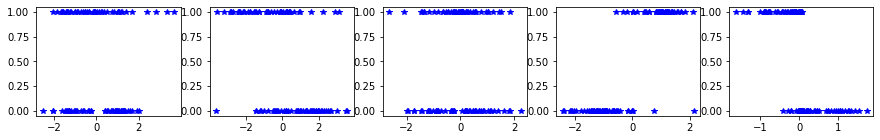

In [5]:
plt.figure(figsize = (15, 2))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.plot(X[:, i], y, 'b*')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CBEDAC27B8>,
      dtype=object)

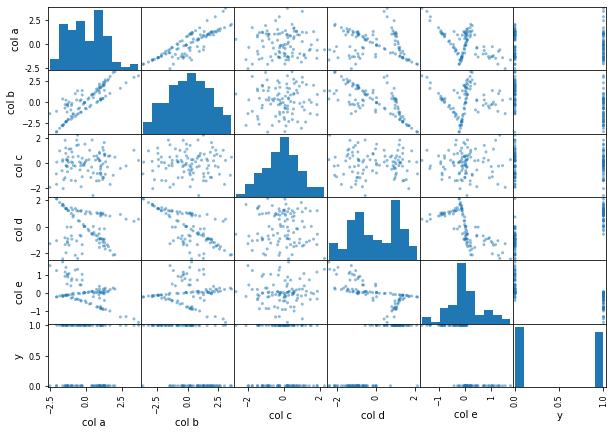

In [6]:
df = pd.DataFrame(X, columns = ['col a', 'col b', 'col c', 'col d', 'col e'])
df['y'] = y

scatter_matrix(df, figsize = (10, 7))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CBEE578518>,
      dtype=object)

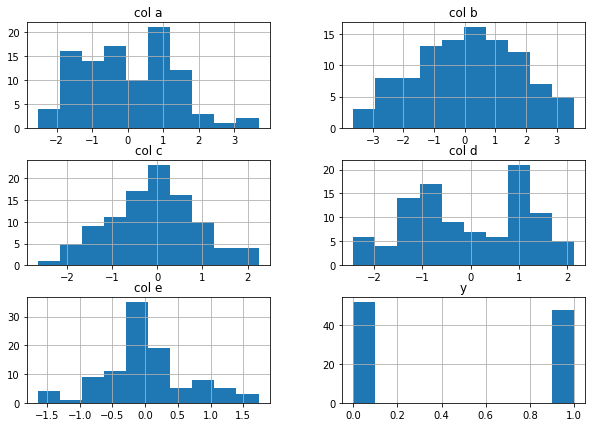

In [7]:
df.hist(figsize = (10, 7))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [9]:
lin_svm = LinearSVC()
lin_svm.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [10]:
lin_svm.score(X_test, y_test)

0.9333333333333333

In [11]:
lin_svm.coef_

array([[ 0.27312454, -0.17936082, -0.08501555,  0.57137029, -0.36645043]])

In [12]:
lin_svm.intercept_

array([-0.09516268])

In [19]:
def plot_line(X, i):
    X_range = np.linspace(X.min(), X.max(), 20)
    y_points = lin_svm.coef_[0][i]*X_range+lin_svm.intercept_
    plt.plot(X_range, y_points, 'r')

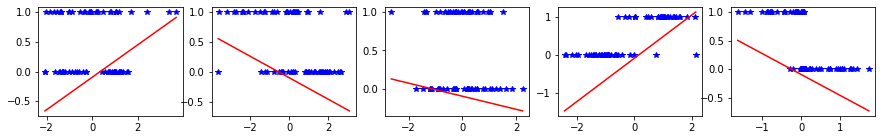

In [20]:
plt.figure(figsize = (15, 2))

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.plot(X_train[:, i], y_train, 'b*')
    plot_line(X_train[:, i], i)